# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [ ]:
import torch

In [ ]:
torch.__version__

'1.13.1+cu116'

### 초기화 되지 않은 행렬 

In [ ]:
# empty임에도 불구하고 메모리에서 사용하던 기존 값들이 그대로 이용됨(쓰레기값)
x = torch.empty(4, 2)
print(x)

tensor([[3.7888e-34, 0.0000e+00],
        [3.5032e-44, 0.0000e+00],
        [       nan, 1.5554e-43],
        [1.1578e+27, 7.1463e+22]])


### 무작위로 초기화된 행렬

In [ ]:
x = torch.rand(4, 2)
print(x)

tensor([[0.6890, 0.5422],
        [0.7370, 0.7210],
        [0.8369, 0.2938],
        [0.7205, 0.9653]])


### dtype이 long, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [ ]:
x = torch.tensor([3, 1, 2, 3])
print(x)

tensor([3, 1, 2, 3])


In [ ]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
# 기존의 shape 유지
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.8988,  2.2522, -1.0121, -1.1983],
        [-0.0200,  1.6317, -0.7953, -1.2101]])


### 텐서의 크기

In [ ]:
# 텐서의 shape 확인
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [ ]:
print(x)

tensor([[-0.8988,  2.2522, -1.0121, -1.1983],
        [-0.0200,  1.6317, -0.7953, -1.2101]])


In [ ]:
# 원소별 덧셈
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.0922, 0.8710, 0.6015, 0.1448],
        [0.2417, 0.8044, 0.6816, 0.2639]])
tensor([[-0.8066,  3.1233, -0.4106, -1.0534],
        [ 0.2217,  2.4361, -0.1137, -0.9462]])


### 덧셈2

In [ ]:
# 원소별 덧셈
print(torch.add(x, y))

tensor([[-0.8066,  3.1233, -0.4106, -1.0534],
        [ 0.2217,  2.4361, -0.1137, -0.9462]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2, 4)
print('Original result:', result)
torch.add(x, y, out=result)
print('Now result:', result)

Original result: tensor([[3.7889e-34, 0.0000e+00, 4.1057e-01, 1.0534e+00],
        [2.2171e-01, 2.4361e+00, 1.1369e-01, 9.4616e-01]])
Now result: tensor([[-0.8066,  3.1233, -0.4106, -1.0534],
        [ 0.2217,  2.4361, -0.1137, -0.9462]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(x)
print(y)
y.add_(x) # y += x
print(y)

tensor([[-0.8988,  2.2522, -1.0121, -1.1983],
        [-0.0200,  1.6317, -0.7953, -1.2101]])
tensor([[0.0922, 0.8710, 0.6015, 0.1448],
        [0.2417, 0.8044, 0.6816, 0.2639]])
tensor([[-0.8066,  3.1233, -0.4106, -1.0534],
        [ 0.2217,  2.4361, -0.1137, -0.9462]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [ ]:
# 어떤 방식을 써도 동일한 결과를 출력(원소별 뺄셈)

x = torch.tensor([[1, 3],
                  [5, 7]])
y = torch.tensor([[2, 4],
                  [6, 8]])
print(x-y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1, -1],
        [-1, -1]])
tensor([[-1, -1],
        [-1, -1]])
tensor([[-1, -1],
        [-1, -1]])


In [ ]:
# 어떤 방식을 써도 동일한 결과를 출력(원소별 곱셈)

x = torch.tensor([[1, 3],
                  [5, 7]])
y = torch.tensor([[2, 4],
                  [6, 8]])
print(x*y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2, 12],
        [30, 56]])
tensor([[ 2, 12],
        [30, 56]])
tensor([[ 2, 12],
        [30, 56]])


In [ ]:
# 어떤 방식을 써도 동일한 결과를 출력(원소별 나눗셈)

x = torch.tensor([[1, 3],
                  [5, 7]])
y = torch.tensor([[2, 4],
                  [6, 8]])
print(x/y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [ ]:
# dot product(내적, 행렬곱)
x = torch.tensor([[1, 3],
                  [5, 7]])
y = torch.tensor([[2, 4],
                  [6, 8]])
print(torch.mm(x, y))

tensor([[20, 28],
        [52, 76]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [ ]:
print(x)

tensor([[1, 3],
        [5, 7]])


In [ ]:
print(x[:, 1])

tensor([3, 7])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [ ]:
# numpy의 reshape와 동일

x = torch.randn(4, 5) # 2차원 4 * 5
y = x.view(20) # 1차원 (20, 1)
z = x.view(5, -1) # 2차원 자동 계산 5 * 4

print(x)
print(y)
print(z)

tensor([[ 1.3305, -2.2084,  0.9526, -1.5025,  0.0038],
        [-0.3866,  0.0362,  0.7467, -0.3228, -1.1652],
        [ 0.2418, -0.3464,  0.0298,  0.2302, -0.3550],
        [-0.2026, -0.7713,  0.7649, -0.4015, -1.0641]])
tensor([ 1.3305, -2.2084,  0.9526, -1.5025,  0.0038, -0.3866,  0.0362,  0.7467,
        -0.3228, -1.1652,  0.2418, -0.3464,  0.0298,  0.2302, -0.3550, -0.2026,
        -0.7713,  0.7649, -0.4015, -1.0641])
tensor([[ 1.3305, -2.2084,  0.9526, -1.5025],
        [ 0.0038, -0.3866,  0.0362,  0.7467],
        [-0.3228, -1.1652,  0.2418, -0.3464],
        [ 0.0298,  0.2302, -0.3550, -0.2026],
        [-0.7713,  0.7649, -0.4015, -1.0641]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.1660])
1.166015625
torch.float32


- 스칼라값 하나만 존재해야함

In [ ]:
x = torch.randn(2)
print(x)
print(x.item()) # ValueError: only one element tensors can be converted to Python scalars
print(x.dtype)

tensor([-0.0599, -0.0981])


ValueError: ignored

### squeeze 
- 차원을 축소(제거)

In [ ]:
# squeeze의 경우 1인차원을 제거함
ts = torch.rand(1, 3, 3)
print(ts)
ts.shape

tensor([[[0.7135, 0.8551, 0.6796],
         [0.7585, 0.8866, 0.4924],
         [0.4993, 0.3889, 0.6555]]])


torch.Size([1, 3, 3])

In [ ]:
t = ts.squeeze()
print(t)
print(t.shape)

tensor([[0.7135, 0.8551, 0.6796],
        [0.7585, 0.8866, 0.4924],
        [0.4993, 0.3889, 0.6555]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [ ]:
ts = torch.rand(1, 3, 3)
print(ts)
print(ts.shape)

tensor([[[0.8953, 0.6179, 0.1565],
         [0.0158, 0.3990, 0.6302],
         [0.2968, 0.2284, 0.7108]]])
torch.Size([1, 3, 3])


In [ ]:
# 특정 위치에 1인 차원을 추가함, 첫번째 차원의 인덱스를 의미하는 숫자 0을 인자로 넣으면 첫번째 차원에 1인 차원이 추가됨
t = ts.unsqueeze(dim=0) # dim
print(t)
print(t.shape) # 3차원 행렬 --> 4차원 행렬

tensor([[[[0.8953, 0.6179, 0.1565],
          [0.0158, 0.3990, 0.6302],
          [0.2968, 0.2284, 0.7108]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(x)
print(y)
print(z)
print('')

print(torch.stack([x, y, z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)
print(c)
print(c.size())

tensor([[[[-7.9860e-01,  1.8777e+00, -1.3486e+00],
          [ 1.6463e-05,  6.9023e-01,  7.0403e-01],
          [ 1.2387e+00,  4.6864e-03, -4.7063e-01]]],


        [[[-2.6164e-03, -4.1648e-01, -3.7962e-01],
          [ 3.0846e-01,  5.4750e-01, -3.9554e-01],
          [ 2.3267e-01, -2.5130e-01, -1.2356e+00]]]])
torch.Size([2, 1, 3, 3])


In [ ]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=1)
print(c)
print(c.size())

tensor([[[-6.1770e-01,  2.3351e+00, -1.8973e-03],
         [-1.1717e+00, -4.2597e-01, -4.4078e-01],
         [ 4.9516e-02,  2.8294e-01, -1.3162e+00],
         [-5.2202e-01,  9.0536e-01,  2.1889e+00],
         [ 1.1652e+00,  2.3294e+00, -1.5464e+00],
         [ 5.4411e-01, -1.5445e+00, -3.0257e-01]]])
torch.Size([1, 6, 3])


### chunk
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1) # chunk의 갯수를 3으로 지정(3등분), 기준 dimension은 1

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.5058, 0.4546, 0.0687, 0.1016, 0.2972, 0.7453],
        [0.0908, 0.1276, 0.0432, 0.1082, 0.8949, 0.9236],
        [0.5358, 0.5510, 0.7335, 0.4014, 0.3751, 0.8133]])
tensor([[0.5058, 0.4546],
        [0.0908, 0.1276],
        [0.5358, 0.5510]])
tensor([[0.0687, 0.1016],
        [0.0432, 0.1082],
        [0.7335, 0.4014]])
tensor([[0.2972, 0.7453],
        [0.8949, 0.9236],
        [0.3751, 0.8133]])


### split
- `chunk`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [ ]:
tensor = torch.rand(3, 6)
t1, t2 =  torch.split(tensor, 4, dim=1) # dimension을 기준으로 얼마만큼의 사이즈(4)까지 자를 것인가 설정, 기준 dimension은 1

print(tensor)
print(t1)
print(t2)

tensor([[0.9480, 0.1811, 0.6265, 0.3434, 0.3607, 0.9107],
        [0.1211, 0.6908, 0.4410, 0.8885, 0.7970, 0.0994],
        [0.8760, 0.8186, 0.4344, 0.2083, 0.9708, 0.7559]])
tensor([[0.9480, 0.1811, 0.6265, 0.3434],
        [0.1211, 0.6908, 0.4410, 0.8885],
        [0.8760, 0.8186, 0.4344, 0.2083]])
tensor([[0.3607, 0.9107],
        [0.7970, 0.0994],
        [0.9708, 0.7559]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
import numpy as np
a = torch.ones(7)
aa = np.ones(7)
print(a)
print(aa)

tensor([1., 1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
a.add_(1) # a += 1(in-place 방식)
print(a)
print(b) # Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # out의 의미: 연산 결과를 변수 a에 저장
print(a)
print(b) # Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [ ]:
import torch

In [ ]:
x = torch.randn(1)
print(x.item())
print(x.dtype)

1.3161771297454834
torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

y = torch.ones_like(x, device=device) # y를 gpu환경에 할당
x = x.to(device) # 만들어진 x를 gpu환경으로 옮김
z = x + y
print(z)
print(z.to("cpu", dtype=torch.double)) # 만들어진 z를 cpu환경으로 옮김

cuda
tensor([2.3162], device='cuda:0')
tensor([2.3162], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [ ]:
import torch

In [ ]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z = y * y * 2
out = z.mean()
print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [ ]:
a = torch.randn(3, 3)
a = (a*3) / (a - 1)
print(a.requires_grad) # 추적 X

a.requires_grad_(True)
print(a.requires_grad) # 추적 시작

b = (a * a).sum()
print(b.grad_fn) # <SumBackward0 object at 0x7fe81117f550>

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [ ]:
out.backward()

In [ ]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x*2
while y.data.norm() < 1000:
  y = y * 2
print(y)

tensor([1759.6780,  317.8589,  347.0760], grad_fn=<MulBackward0>)


In [ ]:
# output이 scalar이어야 backward 연산이 됩니다.

v = torch.tensor([0.1, 1.0, 0.00001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all()) # x값과 y값은 동일하지만 requires_grad 차이만 존재함

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
import torch

In [ ]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print("a.data:", a)
print("a.grad:", a.grad) # 아직 backward를 이용하여 gradient를 구하지 않았기 때문에 None
print("a.grad_fn:", a.grad_fn) # 아직 backward를 이용하여 gradient를 구하지 않았기 때문에 None

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [ ]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [ ]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.grad_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7fe81117f460>


<ipython-input-26-403b26da0b13>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("b.grad:", b.grad)


In [ ]:
print("c.data:", c.data)
print("c.grad:", c.grad)
print("c.grad_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7fe811187100>


<ipython-input-27-035c04ca563a>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("c.grad:", c.grad)


In [ ]:
print("out.data:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7fe811163cd0>


<ipython-input-28-cabb8f7e327b>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("out.grad:", out.grad)


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [ ]:
x = torch.ones(3, requires_grad=True)
y = x ** 2
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [ ]:
grad = torch.tensor([0.1, 1, 100])
z.backward(grad)

In [ ]:
print("x.data:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [ ]:
print("y.data:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7fe81117f760>


<ipython-input-32-b63d98fcbc02>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("y.grad:", y.grad)


In [ ]:
print("z.data:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7fe8111dfdf0>


<ipython-input-33-e6bf01067a56>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print("z.grad:", z.grad)


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [ ]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [ ]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
print(input.shape)
output = m(input)

torch.Size([20, 16, 50, 100])


In [ ]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [2]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [3]:
filters = torch.randn(8, 4, 3, 3)

In [4]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1) 
conv.shape # input이 filter통과후 padding값으로 인해 1, 8, 5, 5로 변경

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [5]:
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [7]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5, ))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader


import torchvision
import torchvision.transforms as transforms

In [15]:
trainset = torchvision.datasets.MNIST(root='/content',
                                     train=True,
                                     download=True,
                                     transform=transform)

testset = torchvision.datasets.MNIST(root='/content',
                                     train=False,
                                     download=True,
                                     transform=transform)


In [16]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [19]:
# iter는 반복을 끝낼 값을 지정하면 특정 값이 나올 때 반복을 끝냅니다. 
# next는 기본값을 지정할 수 있습니다. 기본값을 지정하면 반복이 끝나더라도 StopIteration이 발생하지 않고 기본값을 출력합니다. 즉, 반복할 수 있을 때는 해당 값을 출력하고, 반복이 끝났을 때는 기본값을 출력합니다.
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [21]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [22]:
image = torch_image.numpy()
image.shape

(28, 28)

In [23]:
label = labels[0].numpy()
label.shape

()

In [24]:
label

array(6)

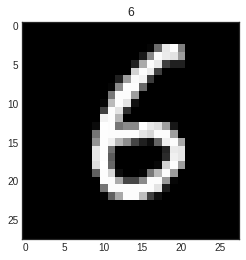

In [25]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [27]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [28]:
# CPU에 올린 Conv2d
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [29]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [30]:
weight = weight.detach()

In [31]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

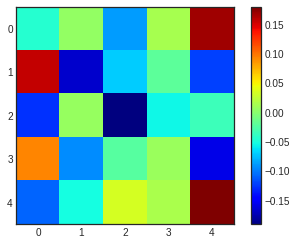

In [33]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [34]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [35]:
input_image = torch.unsqueeze(images[0], dim = 0)

In [36]:
output_data = layer(input_image)

In [37]:
output = output_data.data

In [38]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

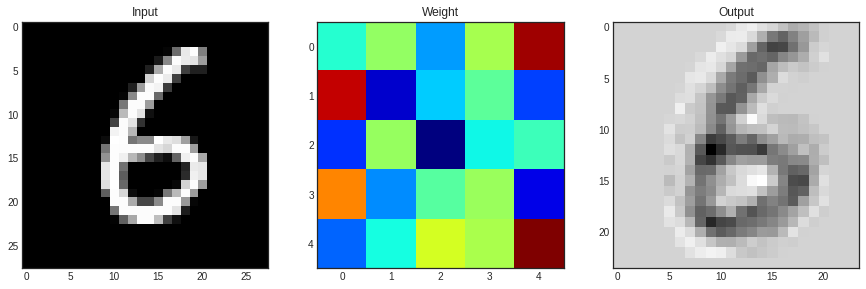

In [39]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [40]:
image.shape

(28, 28)

In [41]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [42]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

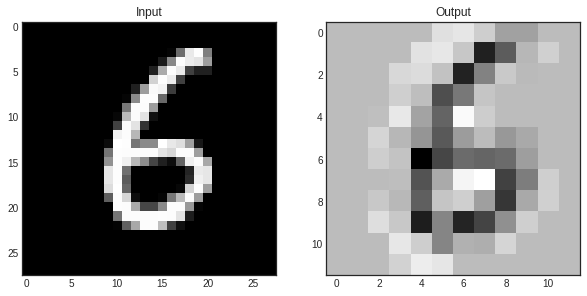

In [43]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [44]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [45]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [46]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [47]:
lin

tensor([[-0.3182,  0.0388, -0.5904, -0.2803, -0.3916, -0.5665, -0.8909, -0.4095,
          0.1851,  0.0668]], grad_fn=<AddmmBackward0>)

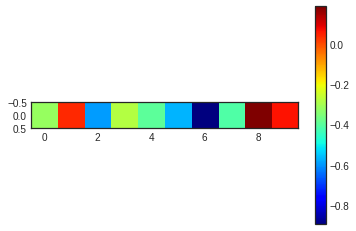

In [48]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [49]:
with torch.no_grad():
  flatten = image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [50]:
softmax

tensor([[0.0588, 0.0728, 0.2398, 0.1083, 0.0673, 0.0288, 0.0525, 0.1508, 0.0636,
         0.1574]])

In [53]:
import numpy as np
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [55]:
inputs = torch.randn(4, 3, 28, 28).to(torch.device("cpu"))
inputs.shape

torch.Size([4, 3, 28, 28])

In [56]:
layer = nn.Conv2d(3, 20, 5, 1).to(torch.device('cpu'))
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

